1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import norm

In [29]:
df = pd.read_csv('regression_generated.csv')
temp_cols = df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df = df[new_cols]
df = df[['features_1', 'features_2', 'features_3']]

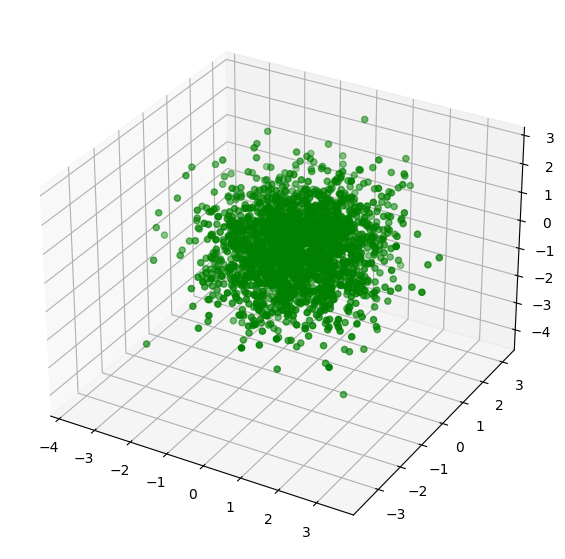

In [31]:
f1 = df['features_1'].values
f2 = df['features_2'].values
f3 = df['features_3'].values

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ='3d')
ax.scatter3D(f1, f2, f3, color='green')


three features are not correlated with eathother
 
The correlation matrix in next cell contains the details of the three features and we see that ,base on this matrix ,this three features are correlated

In [33]:
correlation_matrix = df.corr()
correlation_matrix

,features_1,features_2,features_3
features_1,1.00000,-0.00522,0.02369
features_2,-0.00522,1.00000,0.04736
features_3,0.02369,0.04736,1.00000


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [55]:
def normal_distribution(mean, std, size):
    return np.random.normal(mean, std, size)

In [60]:
dist_1 = normal_distribution(0, 1, (50, 2))
dist_1

array([[-0.27166402,  0.10061608],
       [ 0.88075489,  0.11109369],
       [-0.15719926,  0.55094916],
       [ 1.19192268,  0.15710301],
       [ 2.9525512 , -1.00414821],
       [-0.8823026 , -1.06021242],
       [ 0.18879267,  1.38140639],
       [ 0.70957804, -0.94600384],
       [ 1.89463739,  1.56252757],
       [-0.18922261,  1.67141449],
       [ 1.86491045,  0.68038662],
       [ 1.77790406,  0.14503518],
       [ 0.07323322,  0.53917327],
       [ 0.76814616,  0.95419608],
       [ 0.23551124,  0.05192193],
       [-0.08989815, -0.22200661],
       [-0.80729923,  0.60586605],
       [-0.39533374,  0.13490241],
       [ 1.30226356,  0.27336911],
       [ 0.20560966, -0.57248675],
       [-0.89776137,  0.99507699],
       [ 0.18837733,  0.14944377],
       [-2.48454798,  1.59824101],
       [ 0.21851657,  0.20439705],
       [-1.46498794,  1.9317807 ],
       [ 2.05545442, -1.3204271 ],
       [ 0.98482549,  1.41984871],
       [-0.6111182 ,  0.37470039],
       [-1.50517972,

In [61]:
dist_2 = normal_distribution(0.0052, 9.69, (50, 2))
dist_2

array([[ 5.15332870e+00,  5.76860886e+00],
       [ 1.36751085e+01,  6.09813589e+00],
       [-2.01872791e+00,  1.89055737e+00],
       [ 6.20000115e-01,  1.50638930e+00],
       [ 4.16968696e+00,  8.90855659e+00],
       [ 1.21700412e+01, -5.41925565e+00],
       [-2.04737388e+01,  6.71355174e+00],
       [-3.82735715e+00, -2.11540220e+00],
       [-1.52639955e+01,  1.09640560e+01],
       [ 3.40257603e+00,  1.27651112e+01],
       [-7.84661676e-01,  4.74022530e+00],
       [ 7.07642032e-01, -6.62208810e+00],
       [-4.51759905e+00,  3.02347290e-01],
       [ 7.96498197e+00, -1.22659471e+01],
       [-3.37977226e+00, -5.62127632e+00],
       [-5.38679353e+00,  5.42803351e+00],
       [ 7.55427275e+00, -1.66770815e+00],
       [ 1.89367026e+01,  1.05477521e+01],
       [-2.44589576e+00, -1.30022483e+01],
       [ 9.21973320e-01, -2.82175004e+00],
       [-2.74409435e+01, -1.96299094e+00],
       [ 4.32743706e+00, -3.28823482e+00],
       [-3.04692819e+01, -6.39572642e+00],
       [-1.

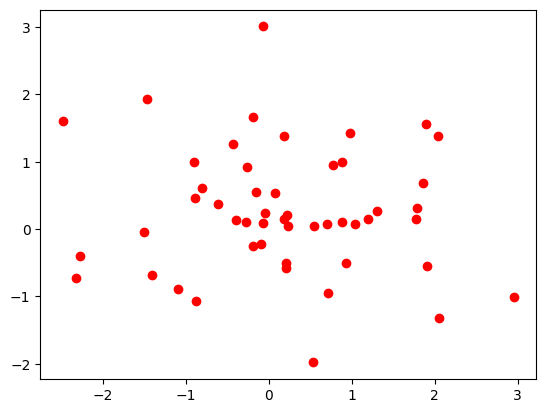

In [62]:
# For distribution 1
f1, f2 = dist_1[:, 0:1].reshape(50, ), dist_1[:, -1].reshape(50, )
plt.scatter(f1, f2, color ='red')

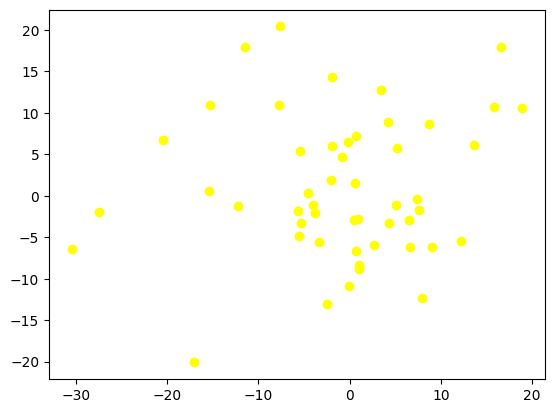

In [63]:
f1, f2 = dist_2[:, 0:1].reshape(50, ), dist_2[:, -1].reshape(50, )
plt.scatter(f1, f2, color='yellow')

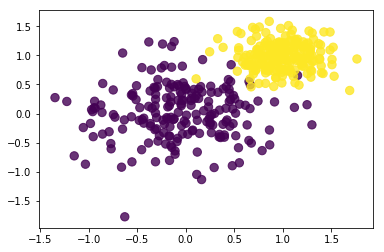

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

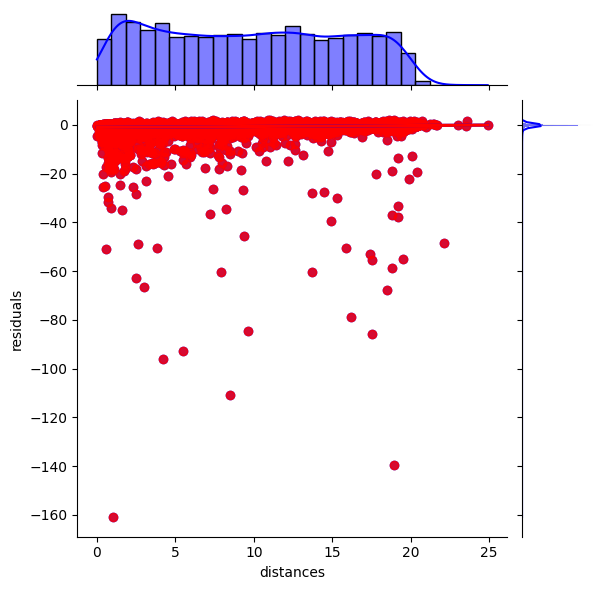

In [120]:
df = pd.DataFrame(pd.read_pickle('residuals_261.pkl').tolist())
df = df[df['residuals'] < 2]

sns.jointplot(data=df, x="distances", y="residuals", kind="reg", color='blue')
sns.regplot(x="distances", y="residuals", data=df, color='red')

plt.show()

In [90]:
corr_mat = df.corr()
corr_mat

,residuals,distances
residuals,1.00000,0.05481
distances,0.05481,1.00000


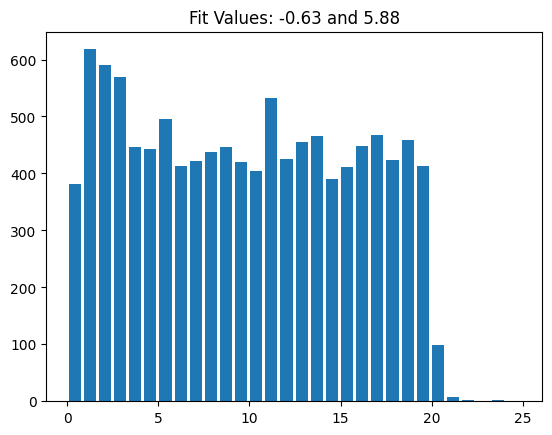

In [115]:
x =  df['distances'].values
y = np.mean(df['residuals'].values)
err_y = np.std(x)

hist, bins = np.histogram(x, bins=30)

xmin, xmax = plt.xlim()
l = np.linspace(xmin, xmax, 100)
p = norm.pdf(l, y, err_y)

plt.title("Fit Values: {:.2f} and {:.2f}".format(y, err_y))

center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=0.8 * (bins[1] - bins[0]))
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


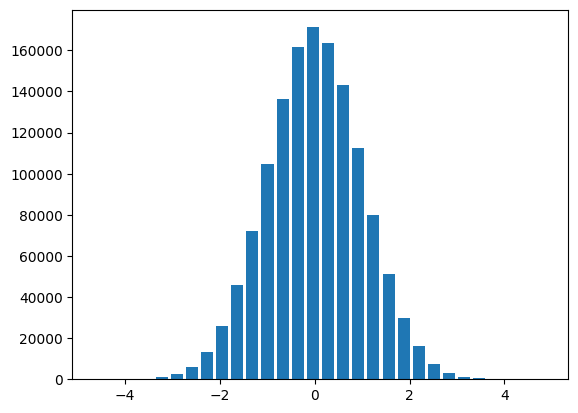

[     8     26     95    342    924   2565   5907  13095  25861  45697
  72356 104899 136421 161484 171209 163655 143353 112533  79991  51231
  29865  15966   7452   3196   1247    436    142     31     11      2]


In [130]:
x = np.random.normal(0, 1, (9000, 150))

hist, bins = np.histogram(x, bins=30)
center = (bins[:-1] + bins[1:]) / 2
plt.ylabel('')
plt.bar(center, hist, align='center', width=0.8 * (bins[1] - bins[0]))
plt.show()